In [4]:
# Data-handling imports
import pandas as pd
import numpy as np

# Unsupervised learning imports
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Other libraries
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load('en')

In [16]:
essays = pd.read_csv(f"../data_private/essays_cleaned.csv")
subset = essays[essays["essay_set"] == 3]

In [19]:
vs = [nlp(doc).vector for doc in subset["essay"]]

In [23]:
km = KMeans(n_clusters=4)
km.fit(vs)

array([3, 2, 0, ..., 3, 3, 2], dtype=int32)

In [26]:
silhouette_score(vs, km.labels_)

0.064653285

In [20]:
cvec = CountVectorizer()
km = KMeans(n_clusters=4)

2 0.18391212605712495
3 0.17215523338897193
4 0.07947583389263332
5 0.06158785504594829
6 0.021067812820881313
7 0.022599428427154036
8 0.009359054058705987
9 0.006537892000858366
10 0.012742022090097211
11 0.005983129663664207
12 0.0057877483401173


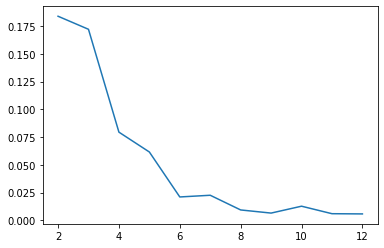

In [17]:
# Essay vectors
essay_vecs = cvec.fit_transform(essays[essay]["essay"])
sils = []
for k in range(2, 13):
    km_cvec = KMeans(n_clusters=k)
    km_cvec.fit(essay_vecs.toarray());
    s = silhouette_score(essay_vecs.toarray(), km_cvec.labels_)
    print(k, s)
    sils.append(s)
    
plt.plot(range(2, 13), sils);

2 0.5843647891397729
3 0.5027662416577375
4 0.4704416762962589
5 0.45128298032255587
6 0.44345714325331553
7 0.4332523989253067
8 0.413578805712649
9 0.38503655974695433
10 0.3852044292800744
11 0.3639192965583853
12 0.34257059162454223


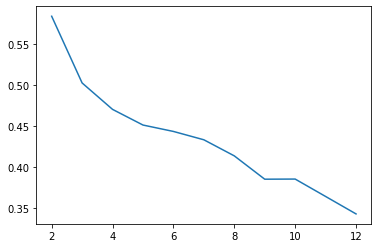

In [19]:
# Other properties
subset = essays[essay].drop(columns=["essay_id", "essay", "essay_set", "score", "domain1_score"])
km.fit(subset)

sils = []
for k in range(2, 13):
    km = KMeans(n_clusters=k)
    km.fit(subset);
    s = silhouette_score(subset, km.labels_)
    print(k, s)
    sils.append(s)
    
plt.plot(range(2, 13), sils);

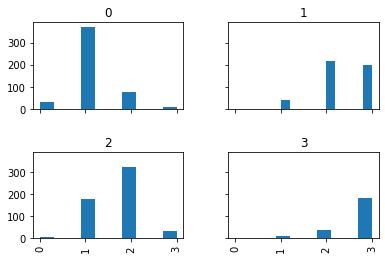

In [7]:
pd.DataFrame({
    "score": essays[essay]["score"],
    "cluster": km.labels_
}).hist("score", by="cluster", sharex=True, sharey=True);